In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Part 1

In [5]:
# Read the file
df = pd.read_json('Data/logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [6]:
# Aggregate by date
df = df.set_index('login_time')
df['logins'] = 1
data = df.resample('1D').sum()
data.head()

,logins
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


<AxesSubplot:xlabel='login_time'>

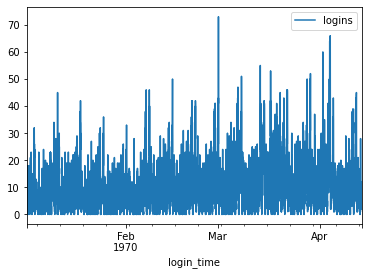

In [7]:
#look for patterns in 15 minute intervals
minuteview = df.resample("15Min").count()
minuteview.plot()

15 minute intervals for a peroid of time this long is not really that useful, I will resample the data for a 15 mintue interval with a more useful approach later

<AxesSubplot:xlabel='login_time'>

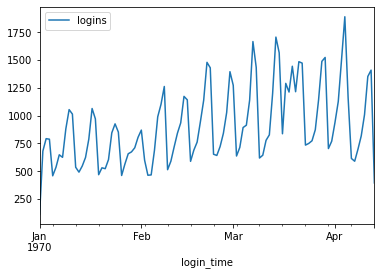

In [8]:
#Look for patterns in daily intervals
dayview = df.resample("D").count()
dayview.plot()

It looks like except for 1 week in March, there is a clear spike in logins on a weekly basis, perhaps weekends?

<AxesSubplot:xlabel='login_time'>

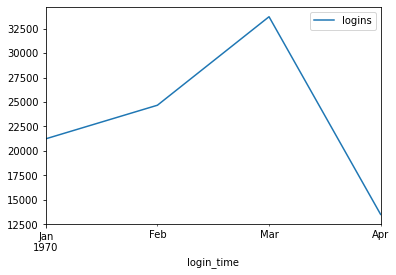

In [9]:
# look for differences between months
monthview = df.resample("M").count()
monthview.plot()

It appears that there is a huge drop in traffic during April, but that is due to having only two weeks of data for that month. There is still an increase in logins during March compared to January and February. 

<AxesSubplot:title={'center':'April'}, xlabel='login_time'>

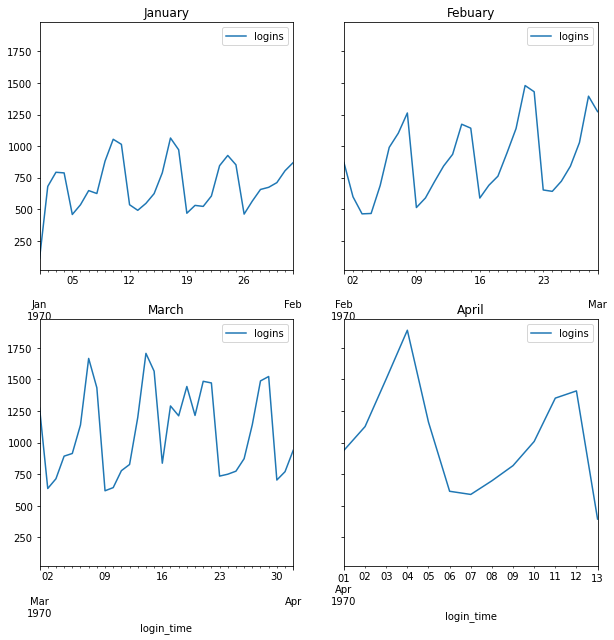

In [10]:
#Compare login traffic for each month
df_jan = data['1970-01-01': '1970-02-01']
df_feb = data['1970-02-01': '1970-03-01']
df_mar = data['1970-03-01': '1970-04-01']
df_apr = data['1970-04-01': '1970-05-01']

figsize = (10,10)
fig, axes = plt.subplots(nrows=2, ncols=2,figsize = (10,10), sharey=True)
df_jan.plot(ax=axes[0,0], title = 'January')
df_feb.plot(ax=axes[0,1], title = 'Febuary')
df_mar.plot(ax=axes[1,0], title = 'March')
df_apr.plot(ax=axes[1,1], title = 'April')

Definitely spikes for each weekend, with increased traffic for the third week of March. April had a great first weekend, before dipping slightly. Next we will compare weekends to weekdays. 

In [11]:
# Separate weekdays and weekends
weekday = df.loc[df.index.weekday<5]
weekend = df.loc[df.index.weekday>=5]
# Aggregate by 15-minute intervals
weekday = weekday.resample('15T').sum()
weekend = weekend.resample('15T').sum()
# Index and groupby by weekdays and weekends 
weekday['time'] = weekday.index.time
weekend['time'] = weekend.index.time
weekday = weekday.groupby('time')['logins']
weekend = weekend.groupby('time')['logins']

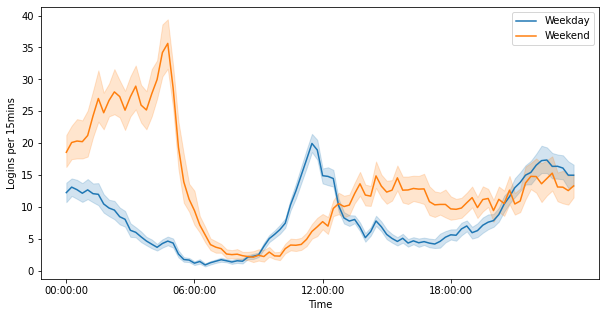

In [12]:
data = df.resample('15T').sum()
data['time'] = data.index.time
data['time'] = data['time']
data['weekend'] = data.index.weekday>=5
plt.figure(figsize=(10,5))
sns.lineplot(x='time', y='logins', hue='weekend', data=data)
plt.xticks(['00:00:00','06:00:00','12:00:00','18:00:00'],['00:00:00','06:00:00','12:00:00','18:00:00'])
plt.xlabel('Time')
plt.ylabel('Logins per 15mins')
plt.legend(['Weekday', 'Weekend'])

For weekdays there is a spike in traffic around noon, with another spike in evening traffic and continuing through the night. For the weekend traffic increases from a low point around 9am and then increases throughout the day and evening until becoming the busiest after midnight spiking at 6am.

# Part 2

2.1

My approach would be to perform an A/B test to compare the effect of reimbursing tolls against the behavior of non-imbursed drivers in the same set of circumstances. 

Assuming that the main goal is to increase the profit margin. The best indicator overall would be the net profit for the different groups. If the main goal were to increase the number of cross-city trips then the main metric would be the number of cross-city trips taken. In any situation I would design the test to ensure I could answer the above two questions and also examine net profit per trip, the number of trips drivers made, the time drivers made trips, and the routes/distance taken. Examining these factors together allows you to not only answer the question if reimbursing tolls is profitable and increases the number of cross-city trips. But also under what circumstances favorable conditions are likely to occur. 

2.2

I would conduct the A/B test over 4 weeks to assess the difference between weekdays and weekends. I would randomly select a mix of at least a few hundred drivers from each city and place an even number from each city into the A/B group. Additionally, If there is data that would help me to classify the drivers as driving part-time or full time or the number of hours they drive per week and on which days and which time, and assuming I had a large enough pool to draw from. I would use this data to select drivers using a stratified random sampling scheme to control for these factors. 
As listed above I would then collect the following data for each group and assess significant differences between each group using hypothesis testing or direct comparison. 

•	Net profit per group 

•	Net profit per trip (z test)

•	Number of trips drivers made (z test)

•	Number of cross-city trips made (chi-square test-since this might end up being a categorical comparison rather than scale)

•	The average distance of cross-city trips (z test)

•	What time did the trips occur, was there a different pattern on weekends vs weekdays?

Based on the following tests, I could determine if there is a significant difference in the amount of profit generated from reimbursing drivers for tolls, which trips were worth reimbursing (based on time, distance), and if incentivizing these types of trips is worth it vs letting drivers revert to their previous patterns.  Depending on the sampling method that was used. I would also be able to answer these questions for subsets of drivers. It might be that offering reimbursement to select subsets of drivers makes sense, but not to others.


# Part 3

In [13]:
#get data
import json
with open('Data/ultimate_data_challenge.json') as f:
    data = json.load(f)
df2 = pd.DataFrame(data)
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [14]:
#mising data likely
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [15]:
#check for missing data 
df2.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [16]:
#Other than avg_rating of driver, the missing data is a very small amount of the data set,
df2.isnull().sum() / len(df2.index)

city                      0.00000
trips_in_first_30_days    0.00000
signup_date               0.00000
avg_rating_of_driver      0.16244
avg_surge                 0.00000
last_trip_date            0.00000
phone                     0.00792
surge_pct                 0.00000
ultimate_black_user       0.00000
weekday_pct               0.00000
avg_dist                  0.00000
avg_rating_by_driver      0.00402
dtype: float64

<AxesSubplot:>

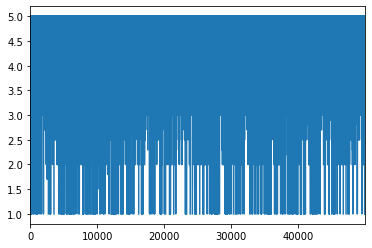

In [17]:
#there is no efficent way to impute for missing data, so we will drop it
df2['avg_rating_of_driver'].plot()

<AxesSubplot:>

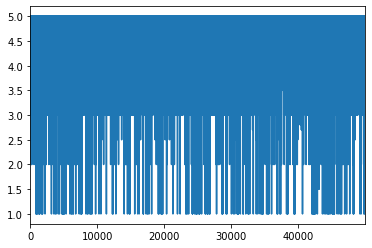

In [18]:
#there is no efficent way to impute for missing data, so we will drop it
df2['avg_rating_by_driver'].plot()

In [19]:
#drop missing data 
df2.dropna(inplace=True, axis=0)
df2.reset_index(inplace = True, drop = True)
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [20]:
df2.isnull().sum() / len(df2.index)

city                      0.0
trips_in_first_30_days    0.0
signup_date               0.0
avg_rating_of_driver      0.0
avg_surge                 0.0
last_trip_date            0.0
phone                     0.0
surge_pct                 0.0
ultimate_black_user       0.0
weekday_pct               0.0
avg_dist                  0.0
avg_rating_by_driver      0.0
dtype: float64

In [21]:
#create datetime objects
df2.last_trip_date = pd.to_datetime(df2.last_trip_date)
df2.signup_date = pd.to_datetime(df2.signup_date)

In [22]:
#define cutoff date for retained users
cutoff = pd.to_datetime('2014-06-01')
#Add retained_user label
df2["retained_user"] = df2.apply(lambda row: 1 if row["last_trip_date"] > cutoff else 0, axis=1)

Text(0, 0.5, 'No. of users')

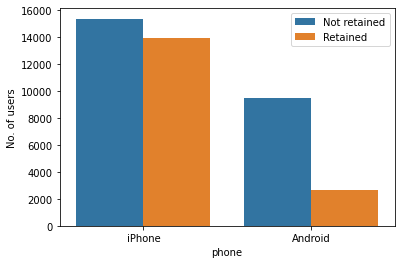

In [23]:
#iphone users are more likely to be retained
sns.countplot(x='phone', hue='retained_user', data=df2)
plt.legend(['Not retained', 'Retained'])
plt.ylabel('No. of users')

Text(0, 0.5, 'No. of users')

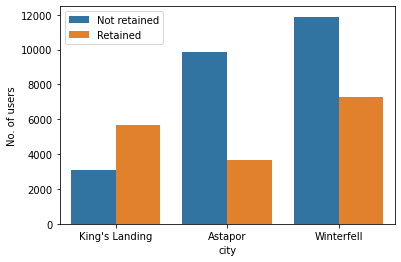

In [24]:
#the only city with more retained users than non retained users is kings landing
sns.countplot(x='city', hue='retained_user', data=df2)
plt.legend(['Not retained', 'Retained'])
plt.ylabel('No. of users')

Text(0, 0.5, 'No. of users')

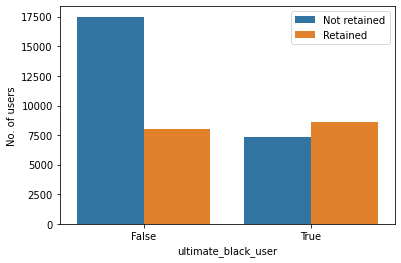

In [25]:
#ultimate black users are slighly more likely to become retained users
sns.countplot(x='ultimate_black_user', hue='retained_user', data=df2)
plt.legend(['Not retained', 'Retained'])
plt.ylabel('No. of users')

<function matplotlib.pyplot.show(close=None, block=None)>

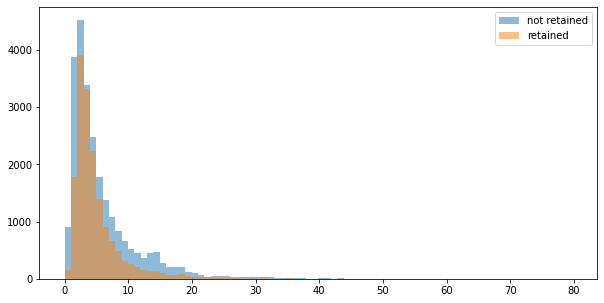

In [26]:
#Average Distance Histogram
retained = df2.loc[df2.retained_user == 1]["avg_dist"]
not_retained = df2.loc[df2.retained_user == 0]["avg_dist"]
plt.figure(figsize=(10,5))
plt.hist(not_retained, bins = 80, alpha=0.5, label="not retained")
plt.hist(retained, bins = 80, alpha=0.5, label="retained")
plt.legend()
plt.show

In [27]:
print("Not retained mean: {}".format(not_retained.mean()))
print("Retained mean: {}".format(retained.mean()))

Not retained mean: 5.824816201634643
Retained mean: 4.914538776493314


It appears that retained users take shorter distance trips

<function matplotlib.pyplot.show(close=None, block=None)>

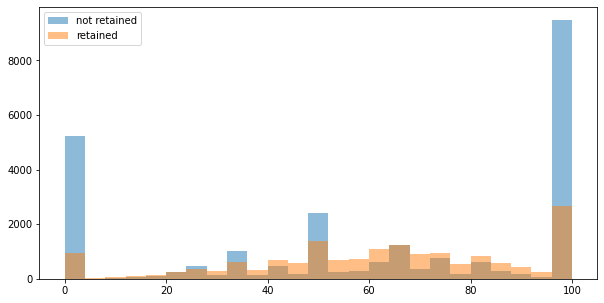

In [28]:
#Weekday Pct Histogram
retained = df2.loc[df2.retained_user == 1]["weekday_pct"]
not_retained = df2.loc[df2.retained_user == 0]["weekday_pct"]
plt.figure(figsize=(10,5))
plt.hist(not_retained, bins = 25, alpha=0.5, label="not retained")
plt.hist(retained, bins = 25, alpha=0.5, label="retained")
plt.legend()
plt.show

Retained users are more likely to make more weekday trips

# Random Forest Model building

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
#create categorical variables 
categorical = df2.loc[:,["city", "phone", "ultimate_black_user"]]
encoder = OneHotEncoder(categories="auto", sparse=False, drop='first')
encoded_categories = pd.DataFrame(encoder.fit_transform(categorical))
encoded_categories.columns = encoder.get_feature_names()
df2_model = df2.drop(["city", "phone", "ultimate_black_user", "last_trip_date", "signup_date"], axis=1)
df2_model = df2_model.join(encoded_categories, how="left")

In [31]:
#split data into training and testing data
X = df2_model.drop("retained_user", axis=1)
y = df2_model[["retained_user"]]

print(np.where(np.isnan(X)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

(array([], dtype=int64), array([], dtype=int64))


In [32]:
#train random forest classifier 
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [33]:
#confusion matrix
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)

print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print("Classification Report")
print(metrics.classification_report(y_test, y_pred))

Confusion Matrix:
[[4087  880]
 [1203 2119]]
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.82      0.80      4967
           1       0.71      0.64      0.67      3322

    accuracy                           0.75      8289
   macro avg       0.74      0.73      0.73      8289
weighted avg       0.75      0.75      0.75      8289



In [34]:
#get accuracy
accuracy_score(y_test, y_pred)

0.7487031004946314

In [35]:
#get feature importances 
feature_importances = pd.DataFrame()
feature_importances["feature"] = X_train.columns
feature_importances["importance"] = classifier.feature_importances_
feature_importances.sort_values(by='importance', ascending=False).head(10)

,feature,importance
5,avg_dist,0.295200
4,weekday_pct,0.139049
6,avg_rating_by_driver,0.114550
0,trips_in_first_30_days,0.089500
1,avg_rating_of_driver,0.082746
3,surge_pct,0.079838
2,avg_surge,0.063400
7,x0_King's Landing,0.056431
9,x1_iPhone,0.034451
10,x2_True,0.028546


The most important feature is the avg distance of each trip, followed by weekday pct and avg rating by driver. This cluster of features suggest that the most likely retained user is someone who makes shorter weekday trips, and adopts proper passenger etiquette as reported by drivers ratings. 